# Credit Card Fraud Detection using Machine Learning

## By: Aman Yadav (21csu502), Shivam (21csu325), Rishabh Goel

### Aim

**Aim of our project is to build a robust and accurate credit card fraud detection system that can differentiate between Legitimate and Fraudelent Transactions. An effective system that minimizes false positives while efficiently identifying fraudulent transactions, helping financial institutions protect their customers and prevent financial losses.**

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset (copying the csv file path using pandas)

In [2]:
data = pd.read_csv(r"C:\Users\MAIN i7\Desktop\creditcard.csv")
# Getting a peak of our data's top 5 entries
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Understanding the Data

In [5]:
# Printing the size of our csv file
print(data.shape) 

(284807, 31)


In [6]:
# Describing our data
data.describe()
# Gives us insiteful info via Descriptive Stats

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Explaining the Data

In [7]:
# Determining the number of fraud cases in our dataset
# In our dataset if Class of the required transaction is 0 that means it is legitimate, if it is 1 then the transaction is fraud
fraud = data[data['Class'] == 1]
legit = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(legit))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Legit Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Legit Transactions: 284315


**So this tells us the no. of fraud cases in our data set comes out to be 492 and this is 0.17% of the entire data.**

In [8]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**This Implies that our data is already Preprocessed and is clean enough to be applied in the model**

### Statistical Measure of Data

In [11]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

**As we can clearly notice from this, the average Money transaction for the fraudulent ones is more**

### Comparing the Values of Both Transactions

In [13]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**This alone shows us the anamoly if you compare the both Legitimate and Fraud Transactions**

### **Data Visualisation**

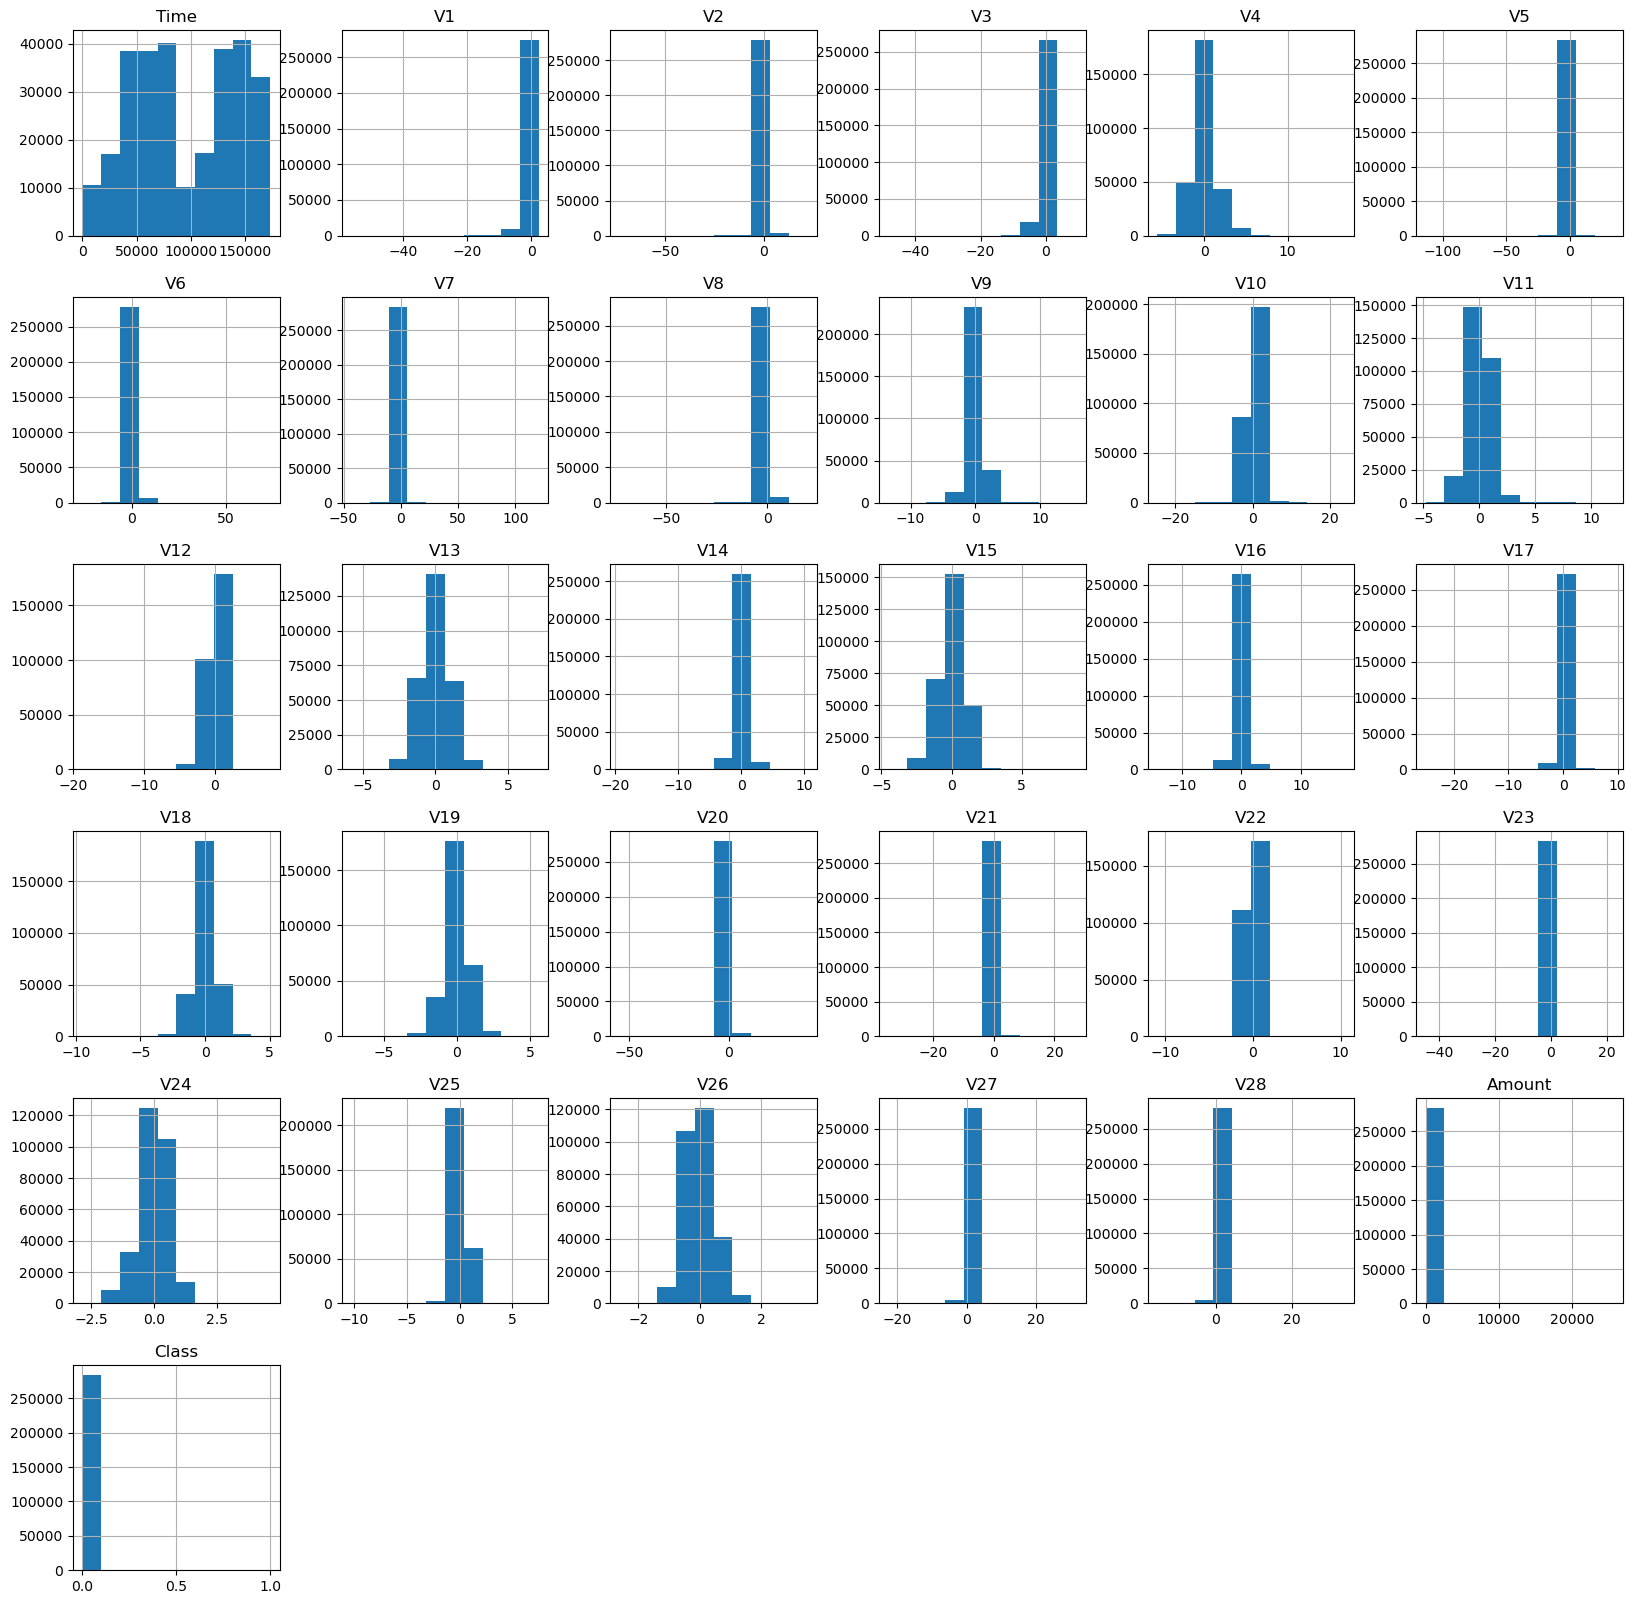

In [14]:
data.hist(figsize=(20,20))
plt.show()

Text(0, 0.5, 'Frequency')

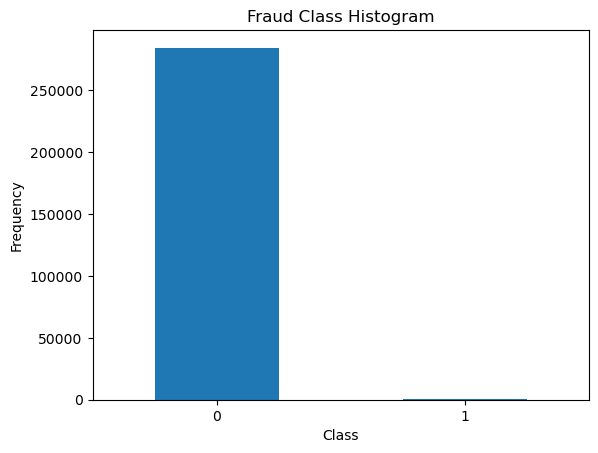

In [15]:
count_classes = pd.value_counts(data['Class'], sort = True ).sort_index()
count_classes.plot(kind = 'bar' ,rot = 0)

plt.title ( "Fraud Class Histogram" )
plt.xlabel( "Class" )
plt.ylabel( "Frequency" )

**Imbalanced Data i.e most of the transactions (99.8%) are not fraudulent which makes it really hard for detecting the fraudulent ones**

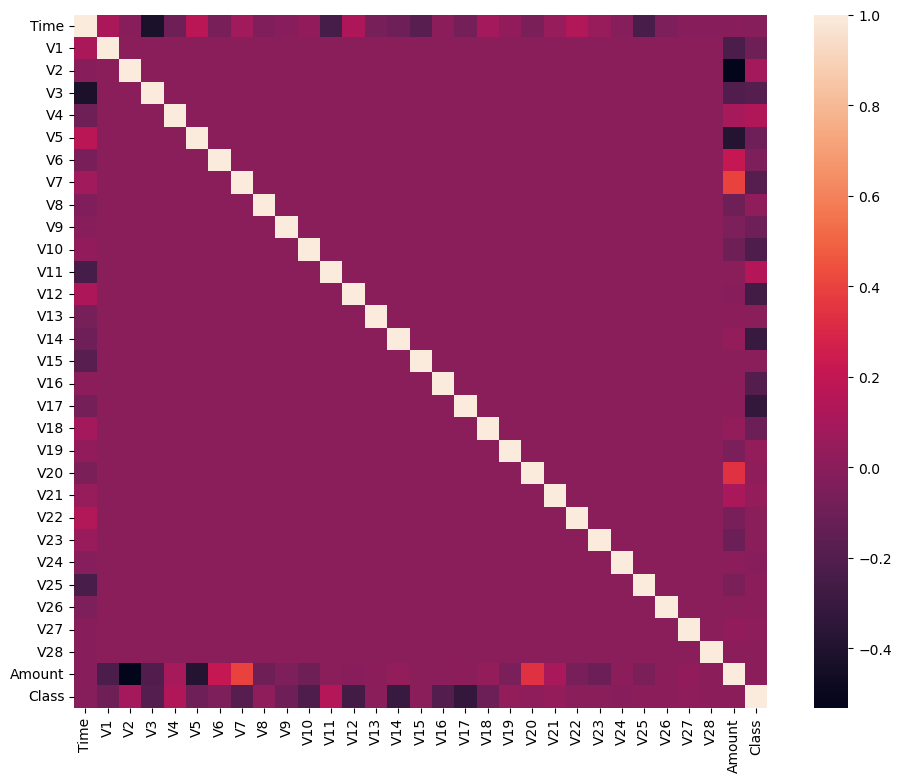

In [16]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, square = True)
plt.show()

**In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. This gives us a deeper understanding of the Data available to us.**

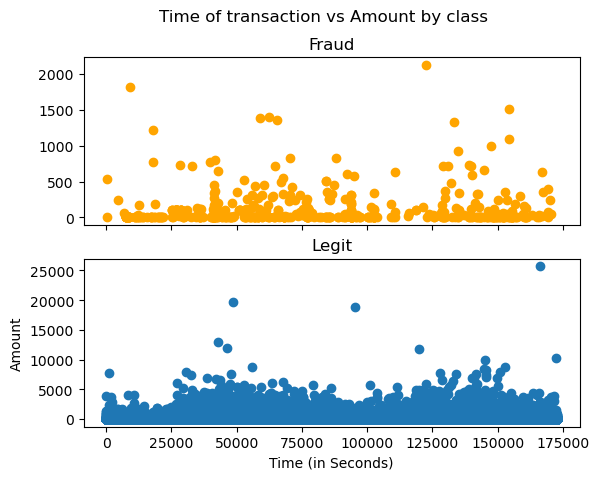

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
#  This line creates a figure object (f) and two subplots (ax1 and ax2) arranged in a 2x1 grid. 
# The sharex=True parameter ensures that the x-axis is shared between the two subplots
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount, color = 'orange')
ax1.set_title('Fraud')
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Legit')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [18]:
Amount_less = data[data['Amount'] < 2500].shape[0]

print("No. of records with amound less than 2500 is: ", Amount_less)

No. of records with amound less than 2500 is:  284358


In [19]:
percentage_less = (Amount_less/data.shape[0])*100
percentage_less

99.84234938045763

**Hence, we observe that the 99.85% of transactions amount to less than 2500.**

**Therefore, the data is really inbalanced and it needs to be fixed before furthur training.**

### What is relationship of fraud transactions with amount of money?
Let us try to determine the nature of transactions which are fraud and obtain a relevant set of the same with respect to their amount.

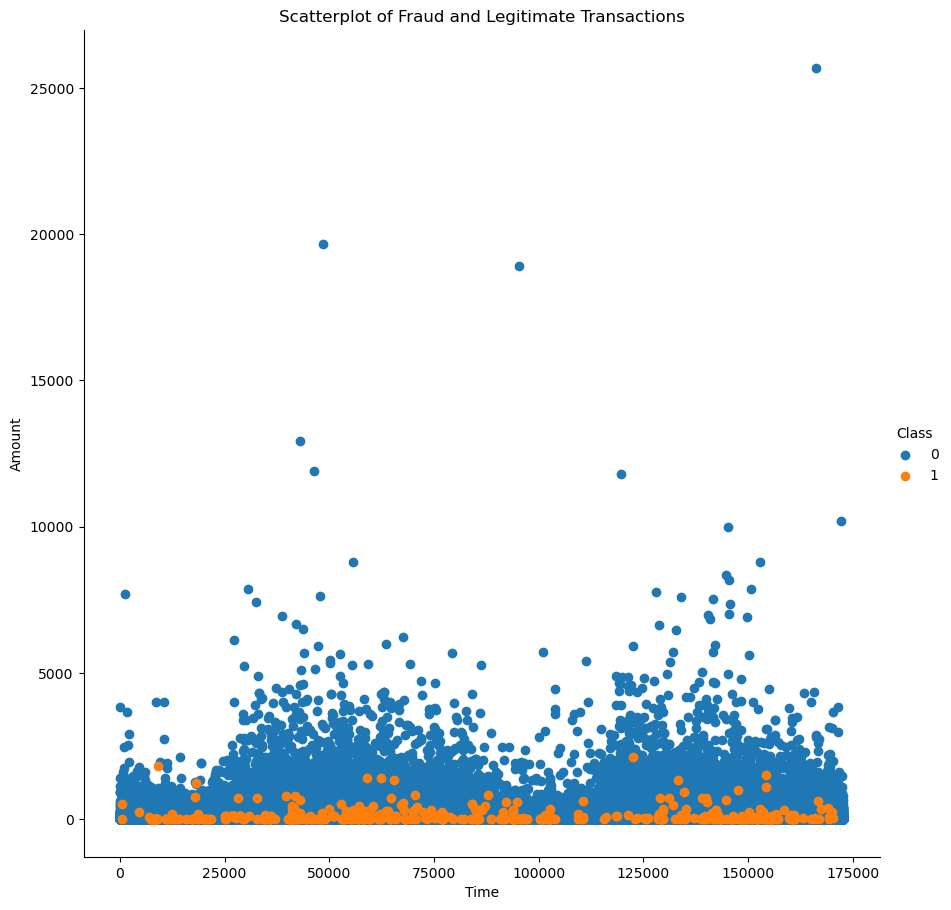

In [20]:
# Creating a FacetGrid with scatterplots
grid = sns.FacetGrid(data, hue='Class', height=9)
grid.map(plt.scatter, 'Time', 'Amount')
grid.add_legend(title='Class')

# Setting axis labels and title
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Scatterplot of Fraud and Legitimate Transactions')

# Displaying the plot
plt.show()

### Insights:
- It can be observed that the fraud transactions are generally not above an amount of 2500.
- It can also be observed that the fraud transactions are evenly distributed about time.

**Checking for Duplicate Values**

In [21]:
data.duplicated().sum()

1081

In [22]:
data.drop_duplicates(inplace = True)

In [23]:
data.shape

(283726, 31)

## Fixing the imbalanced dataset by Implementing SMOTE

**SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique used in machine learning to address class imbalance in datasets. It is particularly useful when dealing with imbalanced datasets where the number of instances in the minority class (in this case, fraudulent transactions) is significantly lower than the number of instances in the majority class (non-fraudulent transactions).**

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
X_old = data.drop(labels=['Class'], axis = 1)
y_old = data['Class']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Applying SMOTE to generate synthetic samples
X_new, y_new = smote.fit_resample(X_old, y_old)

In [26]:
X_old.shape

(283726, 30)

In [27]:
y_old.shape

(283726,)

**Resampled X and y**

In [28]:
print(X_new.shape)
print(y_new.shape)

(566506, 30)
(566506,)


In [29]:
# Counting the number of fraud and legitimate transactions in y_resampled
fraud_count = sum(y_new == 1)
legit_count = sum(y_new == 0)

# Printing the counts
print("Number of fraudulent transactions:", fraud_count)
print("Number of legitimate transactions:", legit_count)

Number of fraudulent transactions: 283253
Number of legitimate transactions: 283253


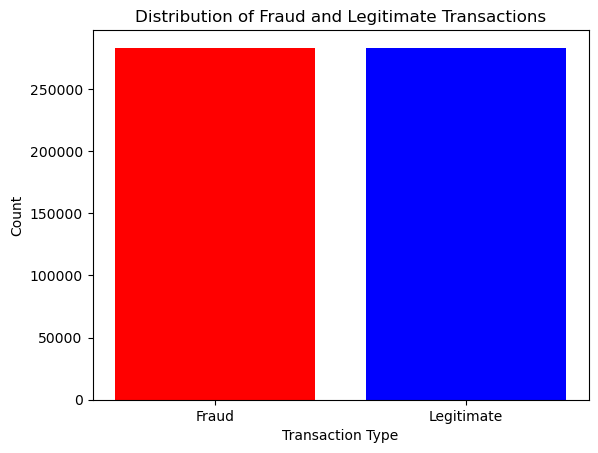

In [30]:
# Plot the histogram
labels = ['Fraud', 'Legitimate']
counts = [fraud_count, legit_count]
colors = ['red', 'blue']  
plt.bar(labels, counts, color=colors)
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Distribution of Fraud and Legitimate Transactions')

plt.show()

### Data isn't imbalanced anymore. It has been fixed by SMOTE

In [31]:
# Combine X_resampled and y_resampled into a single DataFrame
df = pd.DataFrame(X_new, columns=X_new.columns)
df['Class'] = y_new

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
566501,41183.445750,-7.151786,5.337862,-10.524210,6.638176,-7.107253,-3.688276,-11.629728,4.641323,-6.040679,...,2.101089,-0.223411,0.029599,0.393875,-0.049155,0.544700,1.306198,0.223600,17.434148,1
566502,14264.057012,-4.705909,8.250299,-14.559164,9.787990,-4.117161,-3.169121,-10.169571,4.500750,-5.177936,...,1.988732,0.194092,0.480124,-1.079562,-0.444215,0.557467,1.234855,0.627900,1.699263,1
566503,135064.971368,0.407366,1.352354,-4.892782,3.554728,-1.282114,-1.271505,-0.977517,0.462476,-1.442286,...,0.765180,0.703300,0.814076,0.814930,-0.300969,0.168339,0.236775,0.037244,282.964802,1
566504,109361.849259,0.580032,2.773047,-5.790024,5.606953,0.398480,-0.621865,-2.954884,0.837074,-1.822486,...,0.311488,-0.810361,-0.067584,-0.632356,0.414552,0.073243,0.736440,0.358067,4.145185,1
566505,84438.552579,-2.819178,2.410529,-5.833727,4.099991,-2.622497,-2.198030,-6.054611,1.857574,-3.791847,...,1.163557,-0.244352,0.134456,-0.292208,0.685146,0.740121,1.406461,0.319263,5.892535,1


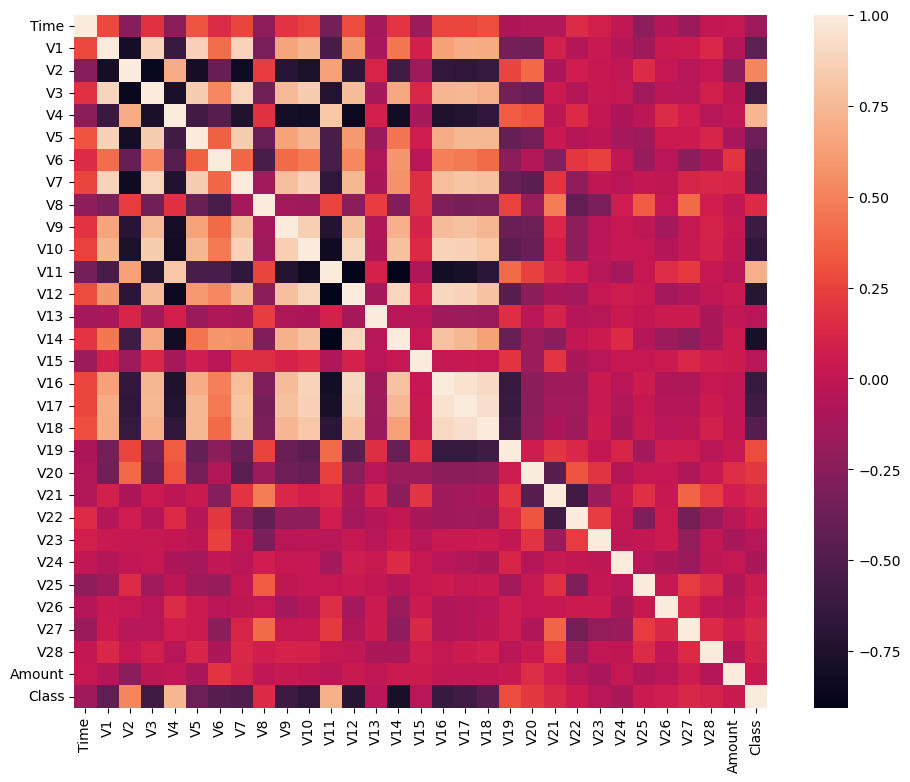

In [33]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, square = True)
plt.show()

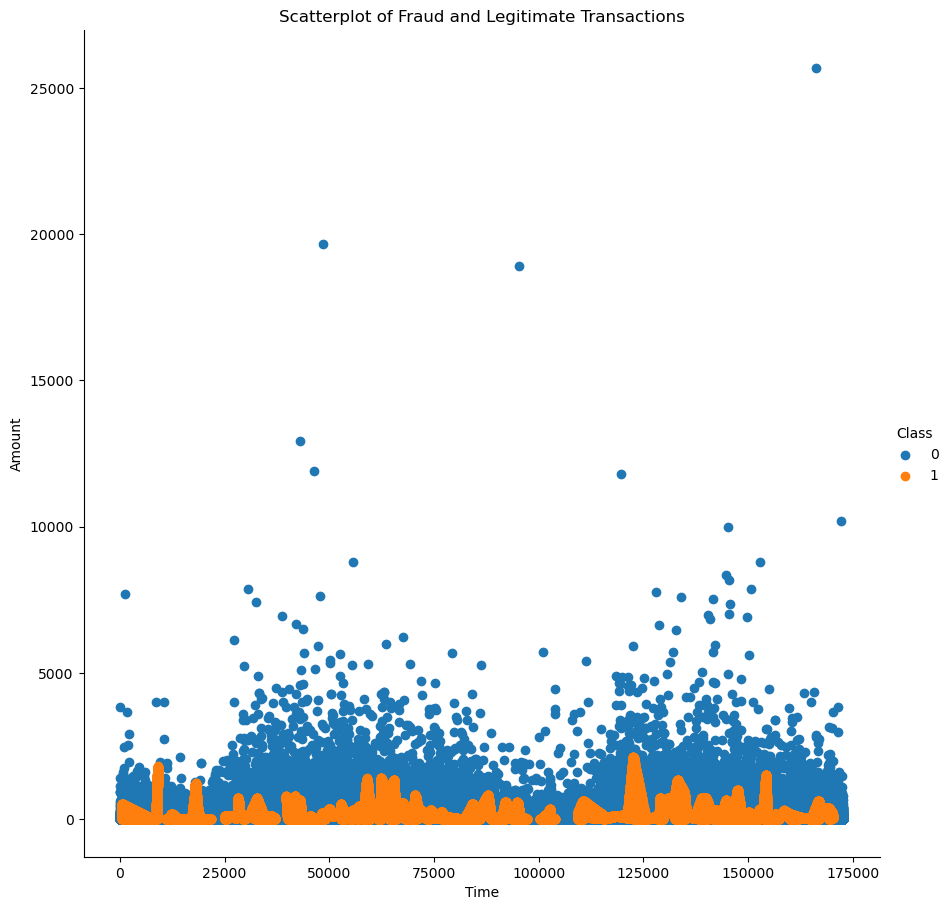

In [34]:
# Creating a FacetGrid with scatterplots
grid = sns.FacetGrid(df, hue='Class', height=9)
grid.map(plt.scatter, 'Time', 'Amount')
grid.add_legend(title='Class')

plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Scatterplot of Fraud and Legitimate Transactions')

plt.show()

## Taking a sample out from our new dataframe

In [35]:
shuffled_df = df.sample(frac=0.2, random_state=42)
# frac = 0.2 means that 20% of the original dataframe is being taken here
shuffled_df 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
554816,48422.549558,1.084606,0.690925,-0.843441,1.359081,0.168721,-0.474593,-0.332476,0.095933,-0.147360,...,0.030615,-0.092788,-0.163899,-0.667837,0.659944,-0.085094,0.135319,0.086631,0.956544,1
19821,30629.000000,-0.923736,1.108088,1.560499,-0.268841,0.075925,-0.230605,0.703012,0.024225,-0.071223,...,-0.259255,-0.387702,0.007894,0.186998,-0.262051,0.053898,0.331941,0.015959,17.990000,0
184234,126440.000000,-1.431701,-1.397938,-1.991814,-2.281973,3.728501,2.114475,-0.799982,1.200862,-1.737078,...,-0.129716,-0.739275,-0.161992,0.695171,0.388090,0.075462,-0.123091,-0.376603,0.950000,0
503641,65366.690879,-3.101443,1.373930,-3.074656,3.390527,-5.665370,2.153805,-0.594211,-3.431825,-1.063649,...,-0.492903,-0.109470,-4.283774,0.547649,-0.955072,-0.189983,1.520310,-0.369614,1334.907329,1
261118,160300.000000,-1.330448,1.119757,-2.572612,1.622074,0.970933,-1.086979,0.505613,0.616914,-0.848251,...,0.032702,0.070120,-0.262940,-0.588721,0.233772,-0.384721,-0.089859,-0.319339,42.300000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389394,43161.808983,-3.343086,1.327976,-4.945165,3.288140,-3.778260,-0.394408,-3.118871,0.995461,-2.694069,...,0.626851,0.481621,0.763275,-0.394874,0.027544,-0.126367,1.666307,0.100677,433.967634,1
194785,131084.000000,-1.713524,-1.454474,-2.085923,1.176238,-1.008929,0.349107,5.266096,-0.825448,-1.659353,...,1.057223,1.422867,1.937434,1.042086,0.637725,-0.322987,-0.178539,0.270746,991.000000,0
357857,77176.622092,-1.277280,1.949499,-1.634332,1.460517,0.092862,-1.095498,-0.963573,0.904495,-1.089951,...,0.150650,-0.450802,-0.175786,-0.296134,0.054207,-0.323501,0.289862,0.153234,25.584721,1
485557,155552.171157,-0.150549,2.563819,-4.471575,3.452277,-0.203731,-1.996415,-1.223127,0.394531,-2.552771,...,0.491682,0.039420,-0.114844,-0.271377,0.395206,0.508317,0.461173,0.235929,68.070126,1


In [36]:
X = shuffled_df.drop(labels=['Class'], axis = 1)
y = shuffled_df['Class']

In [37]:
print(X.shape)
print(y.shape)

(113301, 30)
(113301,)


**So Now our data is shuffled and fit enough to be trained by various algorithms**

## Training the Model

**Let's Build our models:**

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90640, 30)
(22661, 30)
(90640,)
(22661,)


**Checking Constant Features if any present**

In [40]:
constant_features = [
    features for features in X_train.columns if X_train[features].std() == 0
]

len(constant_features)

0

**We will be trying different machine learning models one by one. Defining models are much easier. A single line of code can define our model.**

### Model 1: Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [42]:
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [43]:
y_pred_dt = DT.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

In [44]:
print("Decision Trees:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-Score:", f1_dt)

Decision Trees:
Accuracy: 0.9599311592604033
Precision: 0.9809323966791351
Recall: 0.9389572963059994
F1-Score: 0.9594859896484026


### Visualising the Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix

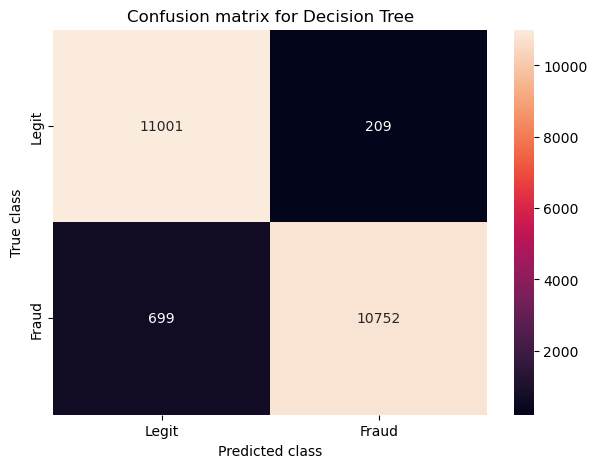

In [46]:
LABELS = ['Legit', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize =(7, 5))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
# The xticklabels and yticklabels parameters are set to the LABELS list, which provides the class labels for the x-axis and y-axis tick labels. 
# The annot=True parameter displays the values of the confusion matrix within each cell. 
# The fmt="d" parameter specifies the format of the values as integers.
plt.title("Confusion matrix for Decision Tree")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Model 2: K-Nearest Neighbours

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [49]:
y_pred_knn = KNN.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

In [50]:
print("K-Nearest Neighbours")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-Score:", f1_knn)

K-Nearest Neighbours
Accuracy: 0.8897665592868805
Precision: 0.8721423227200931
Recall: 0.9161645271155358
F1-Score: 0.8936115843270868


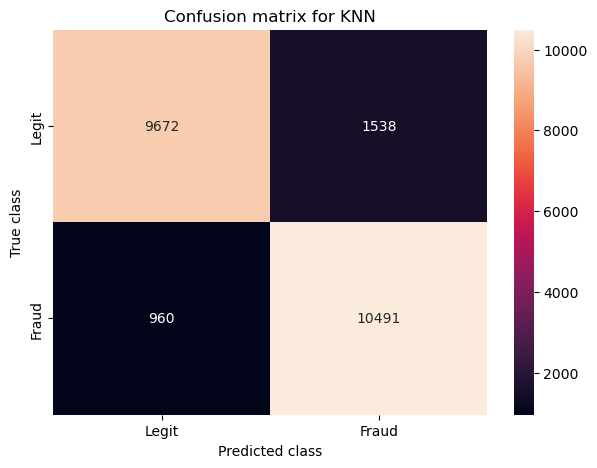

In [51]:
LABELS = ['Legit', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize =(7, 5))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix for KNN")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Model 3: Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [54]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

In [55]:
print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_rf)

Random Forest:
Accuracy: 0.9992939411323419
Precision: 0.9993013710592962
Recall: 0.9993013710592962
F1-Score: 0.9993013710592962


**Best accuracy and F1-Score we got yet**

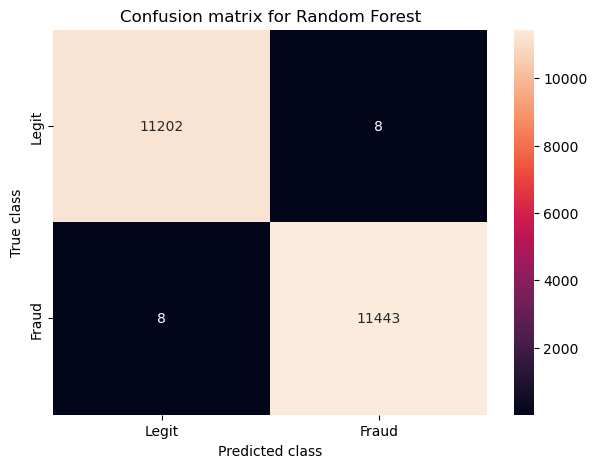

In [56]:
LABELS = ['Legit', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize =(7, 5))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix for Random Forest")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## Conclusion:

**As you can see with our Random Forest Model we are getting the best result**

In [57]:
print("Percentage of Accuracy using Random Forest Algo : ", accuracy_rf*100)

Percentage of Accuracy using Random Forest Algo :  99.9293941132342


**99.92% Accurate**